In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
def fccsuml(a,nc,rc): # input a = lattice parameter, nc = number of unit cells summed over
    n=4 #number of atoms in unit cell 
    r = np.array([(0,0,0),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5)]) # unit cell positions
    ucell=0 # initialize energy 
    for k in range (-nc,nc): # sum over unit cells in x direction 
        for l in range (-nc,nc): # sum over unit cells in y direction 
            for m in range (-nc,nc): # sum over unit cells in z direction
                for i in range (n): # sum over atoms in the unit cell 
                    for j in range (n): # sum over atoms in the unit cell 
                        # dist = distance between atoms 
                        dist = a*np.sqrt((k+r[j,0]-r[i,0])**2+(l+r[j,1]-r[i,1])**2+(m+r[j,2]-r[i,2])**2)
                        if dist>0 and dist <= rc:
                            #make sure distance is nonzero 
                            u=2*(1/(dist**12)-1/(dist**6))# potential/2 
                        else: 
                            u=0
                        ucell = ucell + u #sum the energy 
    ucell=ucell/n # output energy per atom 
    return ucell # output: ucell = energy per atom

In [17]:
def bccsuml(a,nc,rc): # input a = lattice parameter, nc = number of unit cells summed over
    n = 2 #number of atoms in unit cell 
    r = np.array([(0,0,0),(0.5,0.5,0.5)]) # unit cell positions
    ucell=0 # initialize energy 
    for k in range (-nc,nc): # sum over unit cells in x direction 
        for l in range (-nc,nc): # sum over unit cells in y direction 
            for m in range (-nc,nc): # sum over unit cells in z direction
                for i in range (n): # sum over atoms in the unit cell 
                    for j in range (n): # sum over atoms in the unit cell 
                        # dist = distance between atoms 
                        dist = a*np.sqrt((k+r[j,0]-r[i,0])**2+(l+r[j,1]-r[i,1])**2+(m+r[j,2]-r[i,2])**2)
                        if dist>0 and dist <= rc:
                            #make sure distance is nonzero 
                            u=2*(1/dist**12-1/dist**6)# potential/2 
                        else: 
                            u=0
                        ucell = ucell + u #sum the energy 
    ucell=ucell/n # output energy per atom 
    return ucell # output: ucell = energy per atom

In [18]:
def equilibrium_ufcc(nc, rc):#a in range [1.45,1.65]
    a=1.45
    ucellfccs=[]
    for i in range(100):
        ucellfccs.append(fccsuml(a,3,rc))
        a=a+0.002
    return min(ucellfccs)

def equilibrium_ubcc(nc, rc):
    a=1.45
    ucellbccs=[]
    for i in range(101):
        ucellbccs.append(bccsuml(a,3,rc))
        a=a+0.002
    return min(ucellbccs)

In [19]:
rcs=[]
rc = 1
u0fcc = []
u0bcc = []
for i in range(51):#rc in range [1,6]
    rcs.append(rc)
    u0fcc.append(equilibrium_ufcc(int(rc*2), rc))
    u0bcc.append(equilibrium_ubcc(int(rc*2), rc))
    rc = rc + 0.1

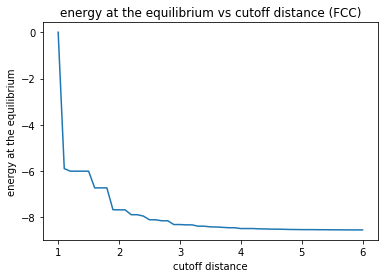

In [20]:
plt.figure()
plt.plot(rcs,u0fcc)
plt.xlabel('cutoff distance')
plt.ylabel('energy at the equilibrium')
plt.title('energy at the equilibrium vs cutoff distance (FCC)')
plt.show()

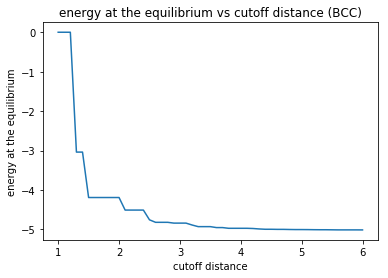

In [21]:
plt.figure()
plt.plot(rcs, u0bcc)
plt.xlabel('cutoff distance')
plt.ylabel('energy at the equilibrium')
plt.title('energy at the equilibrium vs cutoff distance (BCC)')
plt.show()